## HW02 - SF Bike Share Data
This assignment looks at the bike share data from the San Francisco Metro Transit Authority. 

## Section 1: Importing Libraries

### Description
--- 
- This section imports various libraries and options that will be needed thoughout this code. 
  - numpy as np
  - pandas as pd
  - matplotlib as plt
  - seaborn as sns
  - datetime as dt

- This section also adds options to be used throughout the code
    - %matplotlib inline (allows matplotlib to display directly in the jupyter notebook)
    - pd.set_option('display.max_columns',500). Sets the maximum columns displayed to 500. 
    - plt.style.use('seaborn-v0_8') Sets a preference of seaborn as the style for matplotlib. 

In [1]:
# Imports the necessary libraries and sets various options

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
pd.set_option('display.max_columns',500)
plt.style.use('seaborn-v0_8') 

## Summary
---
- All of the libraries imported without issue. 
- The plt.style.use('seaborn') instruction was deprecated, but 'seaborn-v0_8' is the new instruction that delivers the seaborn style. 

## Section 2: Import Data

### Description
--- 
- This section uses pandas .read_csv method to import four files into Dataframes.
- The files:
  - status.csv - records of bike and dock availability by minute
  - station.csv - records of station ID, name, latitude, longitude, dockcount, city, installation date
  - trip.csv - records of individal trips
  - weather.csv - Records of daily weather by city. 
- The code then reduces the columns of df_station and df_weather. 

In [2]:
# reads the csv files in the data directory to four new dataframes 
df_station = pd.read_csv('data/station.csv',index_col=0, header=0)
df_weather = pd.read_csv('data/weather.csv',index_col=None, header=0)
df_status = pd.read_csv('data/status.csv', index_col=None, header=0)
df_trip = pd.read_csv('data/trip.csv', index_col=0, header=0)

In [3]:
# redefines the df_station dataframe to include only the needed columns listed here.
df_station = df_station[['zip_code','name','city','dock_count']]

In [4]:
# redefines the df_weather dataframe to include only the needed columns listed here.
df_weather = df_weather[['date','zip_code','max_temperature_f','mean_temperature_f','min_temperature_f','mean_dew_point_f','mean_humidity','max_wind_Speed_mph','mean_wind_speed_mph','max_gust_speed_mph','precipitation_inches','cloud_cover','events','wind_dir_degrees']]

### Summary
---
This code succesfully pulled data from each of the csv files, and then redefined the df_station and df_weather dataframes to only include the columns needed. 

## Section 3: Change Objects to Dates

### Description
--- 
This section uses the pd.to_datetime function to convert objects to dates. 
- df_status['time']
- df_trip['start_date']
- df_trip['end_date']
- df_weather['date']


In [5]:
# reformats the df_status['time'] column to MM/DD/YY HH:MM
df_status['time'] = pd.to_datetime(df_status['time'],format='%m/%d/%y %H:%M')

In [6]:
# reformats the df_trip['start_date'] column to MM/DD/YY HH:MM
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'], format='%m/%d/%y %H:%M')

In [7]:
# reformats the df_trip['end_date'] column to MM/DD/YY HH:MM
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'], format='%m/%d/%y %H:%M')

In [8]:
# reformats the df_weather['date'] column to MM/DD/YYYY
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%m/%d/%Y')

### Summary
---
- This code converted the columns to date data types. 
- The to_datetime method requests a format parameter so that it does not have to depend upon the dateutil method to infer the structure of the date from the object. 

## Section 4: Create additional Date Features

### Description
--- 
This section creates additional columns using the datetime functions and adds them to their respective Dataframes. 

- In df_weather from the df_weather['date'] column: 
    - df_weather['day'] as a number for dayofweek
    - df_weather['month'] number for month 
    - df_weather['year']
- In the df_trip DataFrame from the df_trip['start_date'] column, 
    - df_trip['date'] 
    - df_trip['day']
    - df_trip['month']
    - df_trip['day_of_week']
    - df_trip['trip_time']
    - df_trip['trip_time_m'] (this is created by casting to dtype timedelta64[s] and then divided by 60 and cast to int64
    
- In the df_status Dataframe, from the df_status['time'] column, 
    - df_status['date'] 

- Both df_trip['date'] and df_status['date'] are then cast to the correct date tye. 

In [9]:
# creates 3 new columns from the df_weather dataframe and various dt methods
df_weather['day'] = df_weather['date'].dt.dayofweek
df_weather['month'] = df_weather['date'].dt.month
df_weather['year'] = df_weather['date'].dt.year

In [10]:
# creates 7 new columns using the df_trip dataframe and various dt methods
df_trip['date'] = df_trip['start_date'].dt.date
df_trip['day'] = df_trip['start_date'].dt.dayofweek.astype('int64')
df_trip['month'] = df_trip['start_date'].dt.month.astype('int64')
df_trip['year'] = df_trip['start_date'].dt.year.astype('int64')
df_trip['day_of_week'] = df_trip['start_date'].dt.day_name()
df_trip['trip_time'] = df_trip['end_date'] - df_trip['start_date']
df_trip['trip_time_m'] = pd.to_timedelta(df_trip['trip_time']).astype('timedelta64[s]').astype('int64')
df_trip['trip_time_m'] = (df_trip['trip_time_m']/60).astype('int64')

In [11]:
# reformats the ['date'] column to month/day/year format in df_trip
df_trip['date'] = pd.to_datetime(df_trip['date'], format='%m/%d/%y')

In [12]:
# creates the ['date']  column in df_status using the ['time'] column and the dt.date method
df_status['date'] = df_status['time'].dt.date

In [13]:
# reformats the ['date'] column to a month/day/year format in df_status
df_status['date'] = pd.to_datetime(df_status['date'], format='%m/%d/%y')

### Summary
---
This code created 11 new columns: 
- 3 in the df_weather Dataframe
- 7 in the df_trip Dataframe
- 1 in the df_status Dataframe 


## Section 5: Explore and Visualize Weather (df_weather)

### Description
--- 
This code creates a table of mean values from the df_weather dataframe, and then displays them in tabular and graphical formats. 

- First, the monthly mean stats are calclated using the groupby function, which found the mean of each of the numerical columns that were not zip_codes, days, months, or years. 
- Next, the mean temperature of the years and months are calculated and displayed using the groupby method. 
- Then, the month mean temperatures are displayed in a barchart using matplotlib. 

In [14]:
# Create an index of the numeric columns from the df_weather dataframe to save in the monthly_stats dataframe later. 
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
numeric_columns = df_weather.select_dtypes(include='number').columns

In [15]:
# the numeric columns index then drops the values that don't make sense having their mean value stored
numeric_columns = numeric_columns.drop(['zip_code','day','month','year'])

In [16]:
# Creates teh monthly_stats dataframe using groupby on df_weather. 
# The groupby is performed by month, and stores the mean of the numeric_columns not excluded in the previous instruction.
monthly_stats = df_weather.groupby(by="month", as_index=False)[numeric_columns].mean()

In [17]:
# Displays the monthly_stats dataframe 
monthly_stats

,month,max_temperature_f,mean_temperature_f,min_temperature_f,mean_dew_point_f,mean_humidity,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees
0,1,63.174194,52.809677,42.538710,41.090323,68.200000,11.312903,2.858065,16.133641,2.187097,256.261290
1,2,64.482143,56.135714,47.635714,46.575000,72.835714,16.410714,5.503571,24.372727,3.660714,248.942857
2,3,69.541935,59.719355,49.577419,46.783172,65.614887,15.987097,5.883871,22.197044,2.903226,253.587097
3,4,69.570000,59.913333,49.976667,45.663333,63.050000,18.506667,7.276667,23.924779,2.730000,283.053333
4,5,70.550489,62.244300,53.628664,47.859935,63.589577,19.506452,8.148387,24.641434,3.516129,278.883871
5,6,75.806667,66.346667,56.633333,53.227425,66.384615,18.163333,7.600000,23.283105,2.340000,282.770000
6,7,77.651613,69.238710,60.500000,56.861290,68.809677,18.758065,7.883871,23.354167,2.977419,277.309677
7,8,77.969136,69.561728,60.873457,57.024845,68.552795,17.941358,7.314815,22.979839,3.040123,277.061728
8,9,77.006667,67.730000,58.330000,55.216216,68.253378,17.863333,6.383333,23.542510,2.486667,300.456667
9,10,74.193548,63.229032,52.203226,48.181818,63.366883,15.106452,4.635484,22.589520,1.961290,284.596774


In [18]:
# Creates two dataframes, year_mean_temp and month_mean_temp by using groupby on df_weather
# then saving the mean temperature for year and month. 
year_mean_temp = df_weather.groupby(by = 'year', as_index=False)['mean_temperature_f'].mean()
month_mean_temp = df_weather.groupby(by = "month", as_index=False)['mean_temperature_f'].mean()

In [19]:
# Displays the year_mean_temp dataframe.
year_mean_temp

,year,mean_temperature_f
0,2013,58.275200
1,2014,62.033973
2,2015,61.902560


In [20]:
# Displays the month_mean_temp dataframe.
month_mean_temp

,month,mean_temperature_f
0,1,52.809677
1,2,56.135714
2,3,59.719355
3,4,59.913333
4,5,62.244300
5,6,66.346667
6,7,69.238710
7,8,69.561728
8,9,67.730000
9,10,63.229032


<Axes: xlabel='month'>

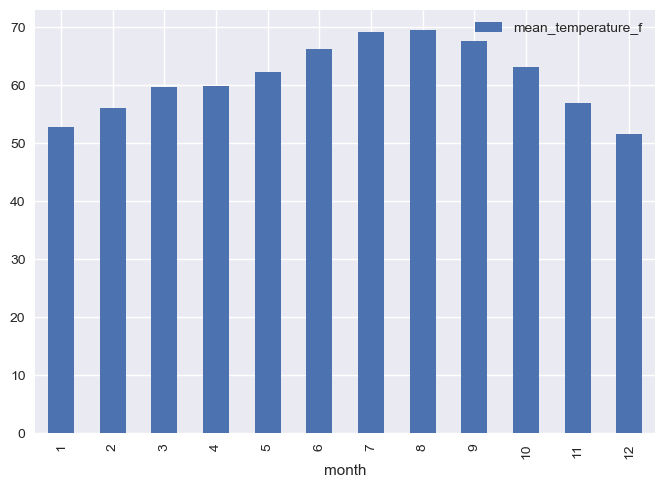

In [21]:
# Creates a bar plot displaying the mean temperature for each month from the month_mean_temp dataframe. 
month_mean_temp.plot.bar(x="month", y="mean_temperature_f")

### Summary
---

This code calculated mean values from the monthly and yearly temperatures included in the df_weather dataframe, and then displayed them in tabular and graphical formats. 

## Section 6: Explore and Visualize Trips

### Description
--- 

This code creates a new dataframe, df_trip_day, that summarizes the numbers of trips in a day.
It then calculates the sum of all of the time spent on trips each day, and adds them to a column, ['trip_time_m']. 
The trip_day['date'] values are then reformatted as date values, and then used to add the day name, month, and year to the df_trip_day dataframe. 
The df_trip_day dataframe is then displayed, using the order shown in the guidelines of Thursday through Wednesday, and displayed in a seaborne subplot of 1 row and 2 columns. The first graph shows the number of trips taken on average each day, and the second graph shows the amount of time spent on average each day.  

In [22]:
# Creates a dataframe, df_trip_day, that counts the number of bike trips by each date using the groupby method on df_trip
df_trip_day = df_trip.groupby(['date'])['bike_id'].count()

In [23]:
# resets the index
df_trip_day = df_trip_day.reset_index()
# renames the bike_id column to trip_count.
df_trip_day = df_trip_day.rename(columns = {'bike_id':'trip_count'})

In [24]:
# Creates a second dataframe, df_trip_m, that shows the sum of trip time in minutes for each date using groupby on df_trip
df_trip_m = pd.DataFrame(df_trip.groupby(['date'])['trip_time_m'].sum())
# resets the index
df_trip_m = df_trip_m.reset_index()

In [25]:
# recasts the trip_time_m value as an integer
df_trip_m['trip_time_m'] = df_trip_m['trip_time_m'].astype(int)

In [26]:
# Merges the df_trip_day and df_trip_m values on the date column. 
df_trip_day = pd.merge(df_trip_day, df_trip_m, how='inner',on='date')

In [27]:
#Add a day_name, month, and year feature to df_trip_day
df_trip_day['date'] = pd.to_datetime(df_trip_day['date'], format="%Y/%m/%d")

In [28]:
# Creates new columns in the df_trip_day dataframe for day_name, month, and year. 
df_trip_day['day_name'] = df_trip_day['date'].dt.day_name()
df_trip_day['month'] = df_trip_day['date'].dt.month.astype('int64')
df_trip_day['year'] = df_trip_day['date'].dt.year.astype('int64')

In [29]:
# Establishes an order for displaying the data in the subplots. This was decided in the guidelines.
order = ['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday']

<Axes: xlabel='day_name', ylabel='trip_time_m'>

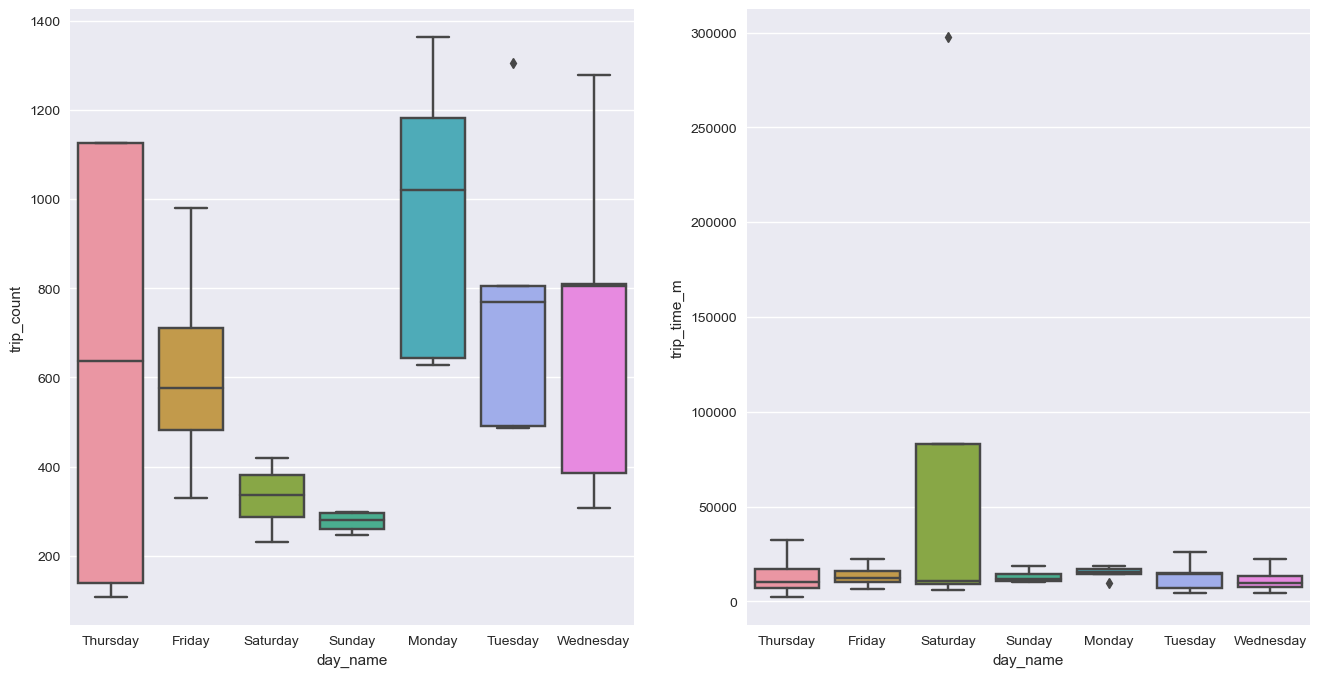

In [30]:
import matplotlib.pyplot as plt
# Set up the subplot structure of 1 row with 2 columns, and the figure at a size of 16 by 8 (inches?)
fig, axes = plt.subplots(1,2, figsize = (16,8))
# Create a boxplot for trip_count for each day of the week. 
sns.boxplot(x='day_name', y="trip_count", data = df_trip_day, ax=axes[0], order=order)
# Create a boxplot for trip_time_m for each day of the week. Using [order] to display according to guidelines. 
sns.boxplot(x='day_name', y="trip_time_m", data = df_trip_day, ax=axes[1], order=order)

### Summary
---
The process for calculating and displaying the data was straight forward, but the contents of the graphs reveal that there is an obvious outlier in trip_time_m on Saturday. The outlier on Tuesday in trip_count is not abnormal, as it is within the normal bounds of surrounding days, and likely is the result of some explainable circumstances. 

## Section 7: Find the outlier and recreate visualization

### Description
--- 
This code finds and removes the outlier from the previous section in figure 2, and then replots the df_trip_day dataframe without the outlier. 

In [31]:
# Identifies the outlier using an extremely high value and drops it using the .drop method. 
# The .index method identifies which index to drop. 
df_trip_day = df_trip_day.drop(df_trip_day[df_trip_day['trip_time_m'] > 100000].index)

<Axes: xlabel='day_name', ylabel='trip_time_m'>

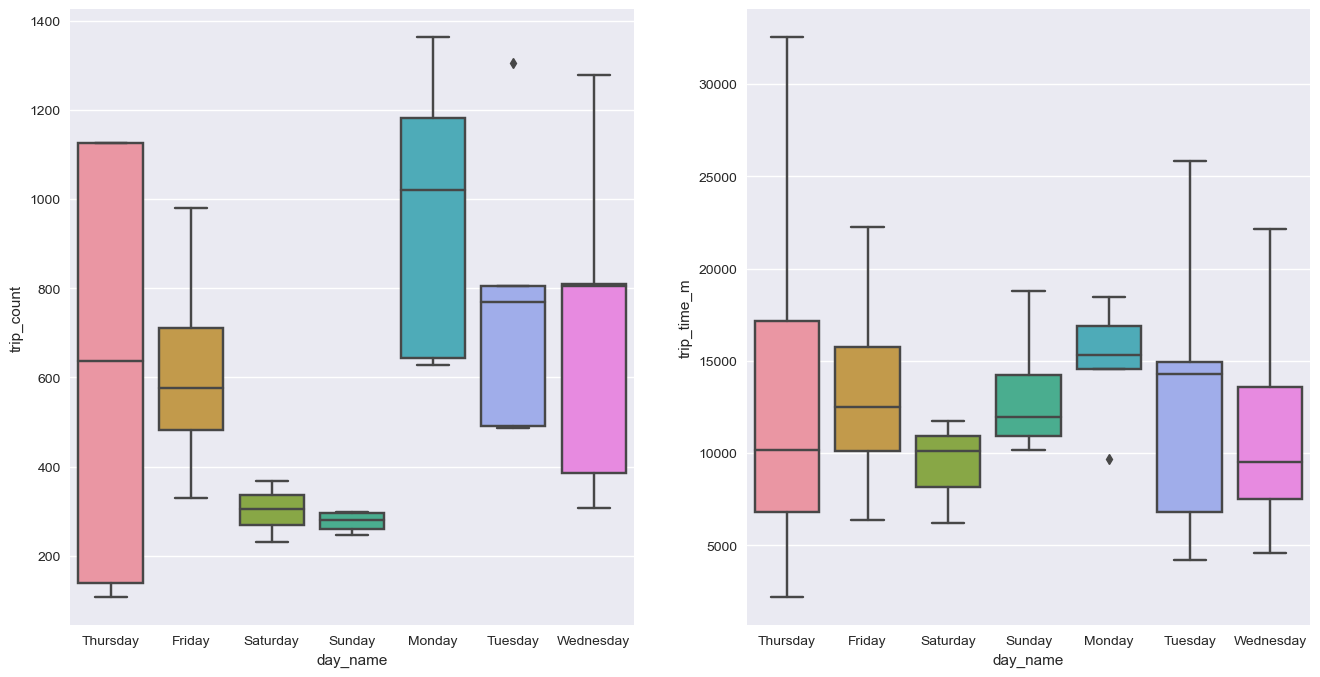

In [32]:
# Set up the subplot structure of 1 row with 2 columns, and the figure at a size of 16 by 8 (inches?)
fig2, axes2 = plt.subplots(1,2, figsize = (16,8))
# Create a boxplot for trip_count for each day of the week in order indicated in guidelines. Sets the plot to position 0. 
sns.boxplot(x='day_name', y="trip_count", data = df_trip_day, ax=axes2[0],order=order)
# Create a boxplot for trip_time_m for each day of the week in order indicated in guidelines. Sets the plot to position 1. 
sns.boxplot(x='day_name', y="trip_time_m", data = df_trip_day, ax=axes2[1], order=order)

### Summary
---
The process for identifying the outlier was arbitrarily set at a value that was three times higher than the upper bounds of the next highest value. Removing the value and replotting the df_trip_day dataframe now shows a normal looking graph that is more useful. 

## Section 8: Merge datasets together into one main Dataframe

### Description
--- 
This section creates two new dataframes, df_status_day and df_bike. 

- df_status_day is created by grouping the df_status values on date and station id, and then calculates the median value of ['bikes available']. The df_status_day column then has it's index reset, and its date column converted into a datetime format. 

- In order for the ['id'] column to appear in the resulting df_bike dataframe, the index for df_station is reset. 

- df_bike is then created by a series of inner merges of: 
     - df_trip to df_station to create df_bike. 
     - df_weather into df_bike
     - the new df_status_day into df_bike. 
     
 - The duplicate values are then removed and the remaining values are renamed to their original name. 
 
 - The resulting df_bike dataframe contains a merged set of data to work with going forward. 

In [33]:
# Create a new Dataframe from df_status named df_status_day 
df_status_day = df_status.groupby(['date','station_id'])['bikes_available'].median()

In [34]:
# Resetting the df_status_day index 
df_status_day = df_status_day.reset_index()

In [35]:
#Setting the date column of df_status_day to a date value with Year/Month/Day format
df_status_day['date'] = pd.to_datetime(df_status_day['date'], format="%Y/%m/%d")

In [36]:
# Resetting the df_station dataframe's index to allow for the ['id'] column to appear in the merged dataframe
df_station = df_station.reset_index()

### Merge 1: df_trip to df_station

In [37]:
# df_trip > df_station > df_weather > df_status_day
df_bike = pd.merge(df_trip, df_station, how="inner", left_on='start_station_id', right_on='id')

### Merge 2: df_bike to df_weather

In [38]:
df_bike = pd.merge(df_bike, df_weather,how="inner",on=['date','zip_code'])

### Merge 3: df_bike to df_status_day

In [39]:
# Using the left_on and right_on parameters allows for two or more columns to serve as the keys 
df_bike = pd.merge(df_bike, df_status_day,how = "inner",left_on=['date','start_station_id'], right_on=['date','station_id'])

### Drop and rename the duplicates

In [40]:
df_bike=df_bike.drop(columns = ['day_y','month_y','year_y'])
df_bike=df_bike.rename(columns = {'day_x':'day','month_x':'month','year_x':'year'})

### Summary
---

This code creates dataframes and then merges them together using the .merge() method. 
In order to merge on multiple factors, the left_on and right_on parameters must be set correctly, and the ordering of the dataframes in the merge method is important for the resulting dataframe structure. 
The resulting dataset contains null values, and will need to be addressed in the next sections. 

## Section 9: Fill in NaN values

### Description
--- 

In this section, the null values in the ['events'], ['precipitation_inches'], ['max_temperatures_f'], ['mean_temperature_f'], ['min_temperature_f'] columns are set to non-null values using the .fillna method. 

In [41]:
# For events, fill all NaN values with the word 'None'
df_bike['events'] = df_bike['events'].fillna('None')

# for precipitation_inches, replace all 'T' values with .001. 
df_bike['precipitation_inches'] = df_bike['precipitation_inches'].replace('T',0.001)

# For ['max_temperature_f'] fill in NaN values with mean() 
df_bike['max_temperature_f'] = df_bike['max_temperature_f'].fillna(df_bike['max_temperature_f'].mean())

# For ['mean_temperature_f'] fill in NaN values with mean() 
df_bike['mean_temperature_f'] = df_bike['mean_temperature_f'].fillna(df_bike['mean_temperature_f'].mean())

# For ['min_temperature_f'] fill in NaN values with mean() 
df_bike['min_temperature_f'] = df_bike['min_temperature_f'].fillna(df_bike['min_temperature_f'].mean())

### Summary
---

The resulting dataframe contains no null values, and can now be used to create useful tables and graphs. 

## Section 10: Create a new column

### Description
--- 
In this section, a new column ['docks_avail'] is created in order to show the number of docks that are available for bikes at each station. This is done by subtracting the ['bikes_available'] column form the ['dock_count'] column. 

In [42]:
df_bike['docks_avail'] = df_bike['dock_count'] - df_bike['bikes_available']

### Summary
---
The df_bike dataframe now has all of the data needed to create a visual in the next section. 

## Section 11: Create your own visual

### Description
--- 
This section contains code that displays data from the df_bike dataframe. 

The barplot uses the plt.subplots to design a 2 row, 1 columns data plot with: 
- The average number of bikes available at each station. 
- The average number of docks available at each station. 



<Axes: xlabel='station_id', ylabel='docks_avail'>

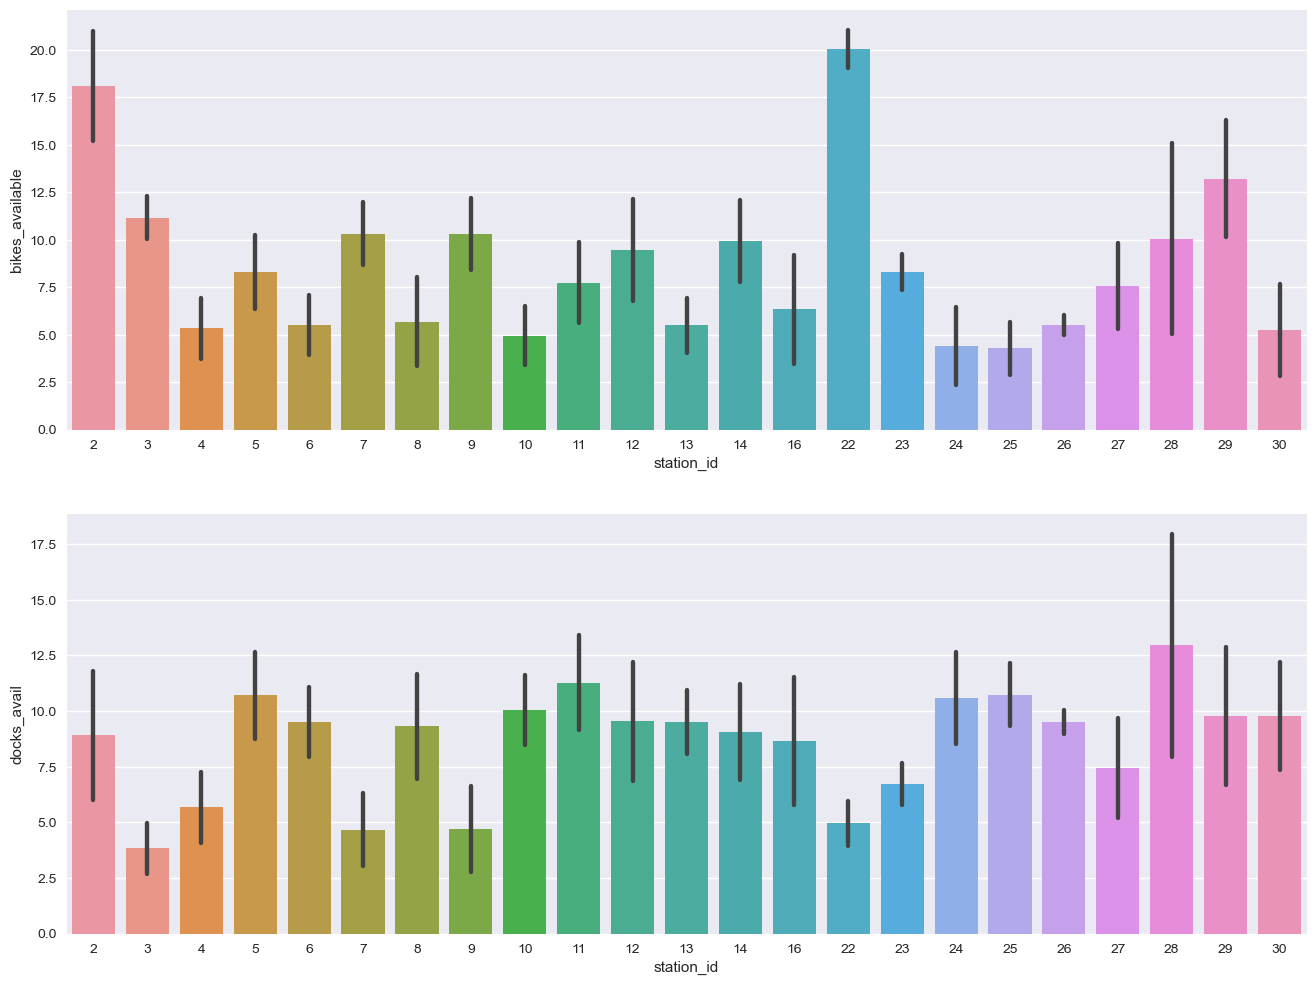

In [43]:
# sets the subplots to 2 rows of 1 column at size 16x12
fig3, axes3 = plt.subplots(2,1, figsize = (16,12))

# Create a boxplot for trip_time_m for each day of the week. The errorbar shows the standard deviation.  
sns.barplot(df_bike, x='station_id',y='bikes_available', errorbar='sd', ax=axes3[0])
sns.barplot(df_bike, x='station_id',y='docks_avail',errorbar='sd', ax=axes3[1])

### Summary
---
This section shows how the df_bike dataframe built in the previous section can be used to create informative data visualizations. Exploring this data shows the number of bikes and open docks available at each station. This could be helpful for someone who is interested in the best place to go to pick up a bike or to drop one off at an open dock.